# Face recognition: detect and track faces in images

## [![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/ml4a/ml4a-guides/blob/ml4a.net/examples/models/face_recognition.ipynb)

The face_recognition module detects faces in images (with all their corresponding landmarks), as well as encoding detected faces into feature vectors which can be compared to identify specific faces or track them over time.

This module a thin wrapper of Adam Geitgey's [face_recognition package](https://github.com/ageitgey/face_recognition/), which is itself based on utilities included in [dlib](http://dlib.net/).

## Set up ml4a and enable GPU

If you don't already have ml4a installed, or you are opening this in Colab, first enable GPU (`Runtime` > `Change runtime type`), then run the following cell to install ml4a and its dependencies.

In [ ]:
%tensorflow_version 1.x
!pip3 install --quiet ml4a

## Run face_recognition

First, let's load an image with a face in it. Photographs work most reliably, but faces can be found in paintings and other kinds of graphics as well.

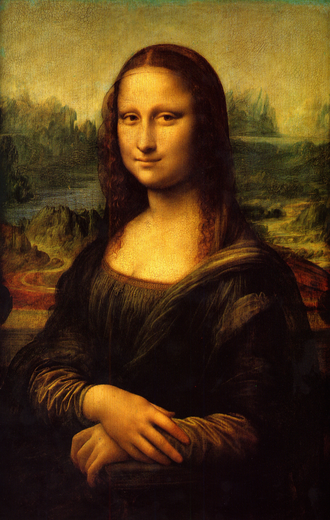

In [2]:
from ml4a import image

img = image.load_image('https://upload.wikimedia.org/wikipedia/commons/6/6a/Mona_Lisa.jpg', (330, 520))
image.display(img)

First we run `face_recognition.get_encodings` to get a list of encodings (feature vectors) for all detected faces. If only one face is found, the list will have only one element in it. For this example, we simply take the first one (`target_encodings[0]`) and pass that to `face_recognition.get_face`, which will obtain the landmarks and bounding box of any face whose encoding matches `target_encodings` to within some threshold.

In [3]:
from ml4a.models import face_recognition

target_encodings = face_recognition.get_encodings(img)
x, y, w, h, target_landmarks = face_recognition.get_face(img, target_encodings[0])

We can crop the original image using the box returned by `face_recognition.get_face`. 

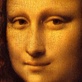

In [4]:
face = img.crop((x,y,x+w,y+h))
image.display(face)

The variable `target_landmarks` refers to the landmarks of the matched face. We can superimpose the landmarks on top of the original image.

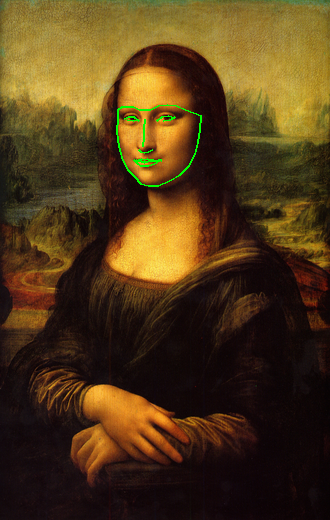

In [5]:
full_img = face_recognition.draw_landmarks(img, target_landmarks, color=(0,255,0), width=2)
image.display(full_img)